# 读取shp文件
### 通过 geoPandas 读取 shp 文件，同时能够逐个显示出来
* 注意这里的 shp 导出的时候，尽量将所有的列名称设置为英文，否则不方便读取

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
all_shp = gpd.read_file('shp_file/村地1地1_旧.shp')
all_shp

,NAME,LAYER,周长,闭合面积,geometry
0,1,Unknown Area Type,374.71 m,0.0071 sq km,"POLYGON ((440535.556 4397285.962, 440493.670 4..."
1,2,Unknown Area Type,313.4 m,0.001829 sq km,"POLYGON ((440418.558 4397401.724, 440401.827 4..."
2,3,Unknown Area Type,863.01 m,0.01462 sq km,"POLYGON ((440339.852 4397546.293, 440320.450 4..."
3,4,Unknown Area Type,242.19 m,0.001374 sq km,"POLYGON ((440483.223 4397710.570, 440479.139 4..."
4,5,Unknown Area Type,208.74 m,0.002316 sq km,"POLYGON ((440452.353 4397734.410, 440435.073 4..."
5,6,Unknown Area Type,142.74 m,0.001182 sq km,"POLYGON ((440370.977 4397813.666, 440357.309 4..."
6,7,Unknown Area Type,158.07 m,0.00137 sq km,"POLYGON ((440343.170 4397821.992, 440321.020 4..."
7,8,Unknown Area Type,108.12 m,0.000589 sq km,"POLYGON ((440297.612 4397843.829, 440312.303 4..."
8,9,Unknown Area Type,105.77 m,0.0002451 sq km,"POLYGON ((440288.818 4397848.082, 440284.000 4..."
9,10,Unknown Area Type,122.45 m,0.0003195 sq km,"POLYGON ((440282.883 4397851.573, 440275.482 4..."


<Axes: >

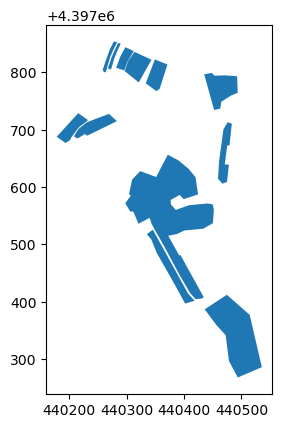

In [22]:
# 仅显示前三行并显示plot
all_shp.plot()

/Users/outianyi/miniforge3/envs/pytorch_env/lib/python3.8/site-packages/geopandas/plotting.py:695: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


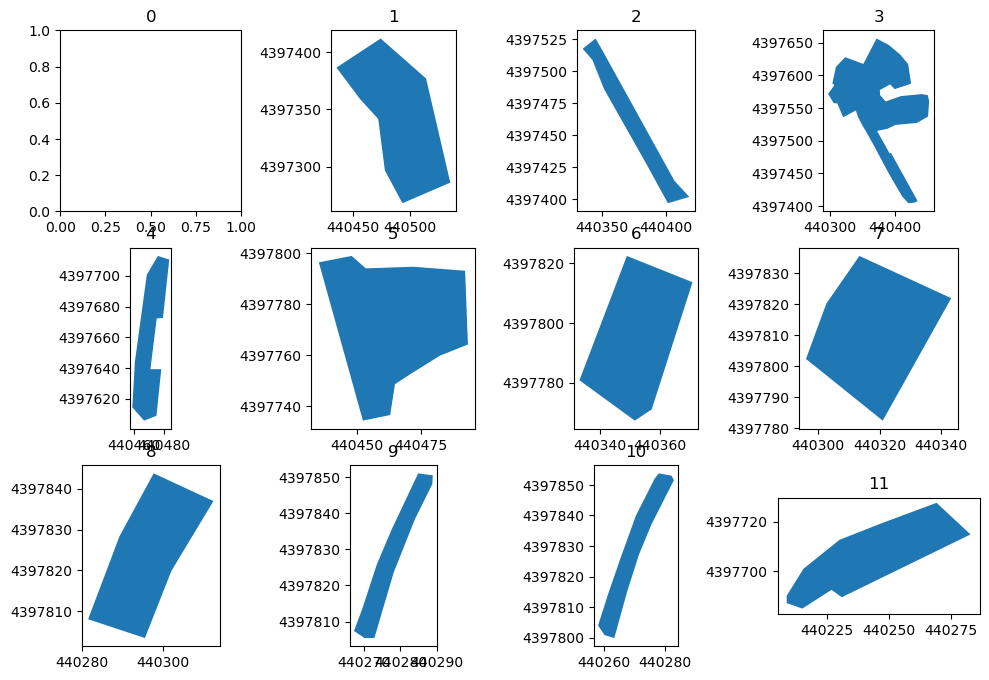

In [26]:
# 分别显示12 个图，不要按照科学显示法显示坐标轴数字
fig, axes = plt.subplots(3, 4, figsize=(12, 8))
for i, ax in enumerate(axes.flatten()):
    all_shp.iloc[i-1:i].plot(ax=ax)
    ax.set_title(i)
    ax.ticklabel_format(useOffset=False, style='plain')

In [23]:
type(all_shp.iloc[0].geometry)

shapely.geometry.polygon.Polygon

In [29]:
all_shp.head(1)

,NAME,LAYER,周长,闭合面积,geometry
0,1,Unknown Area Type,374.71 m,0.0071 sq km,"POLYGON ((440535.556 4397285.962, 440493.670 4..."


In [30]:
# 更改名称，将‘周长’和‘闭合面积’改为英文版本
all_shp.rename(columns={'周长':'perimeter', '闭合面积':'area'}, inplace=True)
all_shp.head(1)

,NAME,LAYER,perimeter,area,geometry
0,1,Unknown Area Type,374.71 m,0.0071 sq km,"POLYGON ((440535.556 4397285.962, 440493.670 4..."


In [31]:
# 保存all_shp 中的第二个为单独的shp文件
all_shp.iloc[1:2].to_file('shp_file/村地1地1_旧_第二个.shp')

<Axes: >

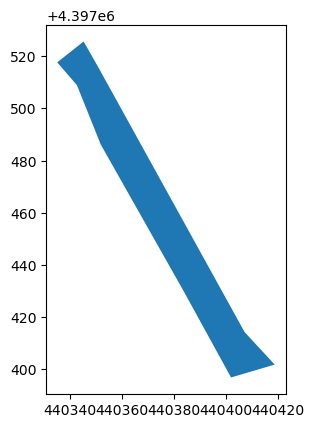

In [33]:
# reload
all_shp2 = gpd.read_file('shp_file/村地1地1_旧_第二个.shp')
all_shp2.plot()

In [36]:
# 仅显示外轮廓
a = all_shp2.iloc[0].geometry.exterior

In [39]:
all_shp2.crs

<Projected CRS: EPSG:32651>
Name: WGS 84 / UTM zone 51N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 120°E and 126°E, northern hemisphere between equator and 84°N, onshore and offshore. China. Indonesia. Japan. North Korea. Philippines. Russian Federation. South Korea. Taiwan.
- bounds: (120.0, 0.0, 126.0, 84.0)
Coordinate Operation:
- name: UTM zone 51N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

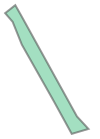

In [43]:
all_shp2.geometry[0]